# Assignment 3 - Predictive analysis : Classification

**Group number**: A-5 <br>
**Name student**: Zanou Rih & Sanaa El Marbouh<br>
**Student Number**: 300178068 & 300267783 <br>

##1. Introduction
This Jupyter Notebook applies a Decision Tree Classifier to predict student performance working with the data set explained below. We preprocess the dataset, train and evaluate different models, and test various settings to improve accuracy. Finally, we select the best model and assess its performance on an unseen test set.

##2. Dataset Description - Student Classification Dataset

&#128279; **Link**: https://www.kaggle.com/datasets/jacksondivakarr/student-classification-dataset
<br>
&#128100; **Author**: Jackson Divakar R <br>

**Size**: 16 Columns, 144 rows <br>
**Description**:  <br>
This dataset encompasses various aspects related to student performance. Each entry is uniquely identified by an 'Id'. The dataset includes demographic information such as 'Student_Age' and 'Sex'. 'High_School_Type' categorizes the type of high school attended, while 'Scholarship' indicates whether the student has a scholarship. Details about 'Additional_Work' and involvement in 'Sports_activity' provide insights into extracurricular commitments.

'Transportation' outlines the mode of commuting for each student. Academic aspects are captured through 'Weekly_Study_Hours', 'Attendance', and evaluations of 'Reading', 'Notes', and 'Listening_in_Class'. The culmination of these factors is reflected in the 'Grade' column, providing a comprehensive overview of student performance. This dataset serves as a valuable resource for exploring the multifaceted dynamics influencing academic outcomes.

**Key Features**: <br>
ID: A unique identifier for each student.

Student_Age: The age of the student

High_School_Type: The type of school the student attended

Scholarship: The percentage of tuition covered by the scholarship

Additional_Work: Indicates wether a student does additional work or not

Sports_Activity: Indicates whether or not a student does any sports activity

Transportation: The type of transportation used by the student

Weekly_Study_Hours: The number of hours a student spends studying per week

Attendance: Indicates the level of attendance of student (never, sometimes, always)

Reading: Indicates if the students reads outside of class.

Notes: Indicates if the student takes notes during class

Listening_in_Class: Indicates if the students listens in class or not.

Project_work: Indicates if the student does project work or not

Grade: Final Grade of the student


In [ ]:
# IMPORT STATEMENTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# raw file URL from github
git_url_ds = "https://raw.githubusercontent.com/zanoudev/csi4142-ds/refs/heads/master/student.csv"

#load DS
ds = pd.read_csv(git_url_ds)

# display the first few rows
ds.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


##3. Classification Empirical Study with Decision Tree

###3.1 Data Cleaning and Imputation

In [12]:
# Replace "None" with "0%" in Scholarship column
ds["Scholarship"] = ds["Scholarship"].replace([np.nan], "0%")


# Check for missing values in each column
missing_values = ds.isnull().sum()

# Print missing values summary
print("\nMissing values in each column:")
if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("No missing values found.")

# Display row indices where missing values exist
missing_rows = ds[ds.isnull().any(axis=1)]

if not missing_rows.empty:
    print("\nRows with missing values:")
    print(missing_rows.index.tolist())  # Prints the row indices with missing values
else:
    print("\nNo rows contain missing values.")



Missing values in each column:
No missing values found.

No rows contain missing values.


&#x2705; NO MISSING VALUES

When cleaning the Scholarship column, we noticed a missing value at row 93 so we replaced "None" in the Scholarship column with "0%" to ensure consistency and remove missing values.

In [16]:
# RANGE CHECK

# Ensure numerical columns are properly converted
ds["Student_Age"] = pd.to_numeric(ds["Student_Age"], errors="coerce")
ds["Scholarship"] = ds["Scholarship"].str.replace("%", "").astype(float)  # Remove % and convert to float
ds["Weekly_Study_Hours"] = pd.to_numeric(ds["Weekly_Study_Hours"], errors="coerce")

# Define realistic value ranges for numerical columns in the student dataset
ranges = {
    'Student_Age': (18, 26),  # Assuming students are between 18 and 26 years old
    'Scholarship': (0, 100),  # Scholarship is a percentage (0% to 100%)
    'Weekly_Study_Hours': (0, 100),  # Assuming a max of 100 study hours per week
}

# Check for out-of-range values
for column, (min_val, max_val) in ranges.items():
    out_of_range = ~ds[column].between(min_val, max_val)
    if out_of_range.any():
        print(f"Out-of-range values detected in '{column}':")
        print(ds.loc[out_of_range, ['Id', column]])  # Display affected rows
        # Handle out-of-range values (e.g., set to NaN)
        ds.loc[out_of_range, column] = np.nan
    else:
        print(f"No out-of-range values detected in '{column}'.")


No out-of-range values detected in 'Student_Age'.
No out-of-range values detected in 'Scholarship'.
No out-of-range values detected in 'Weekly_Study_Hours'.


&#x2705; NO OUT OF RANGE VALUES

###3.2 Numerical feature encoding (optional)

###3.3 EDA and Outlier detection

We will first visualize the distribution of each attribute to detect any outliers.

One-hot encoding already applied. Skipping duplicate encoding.


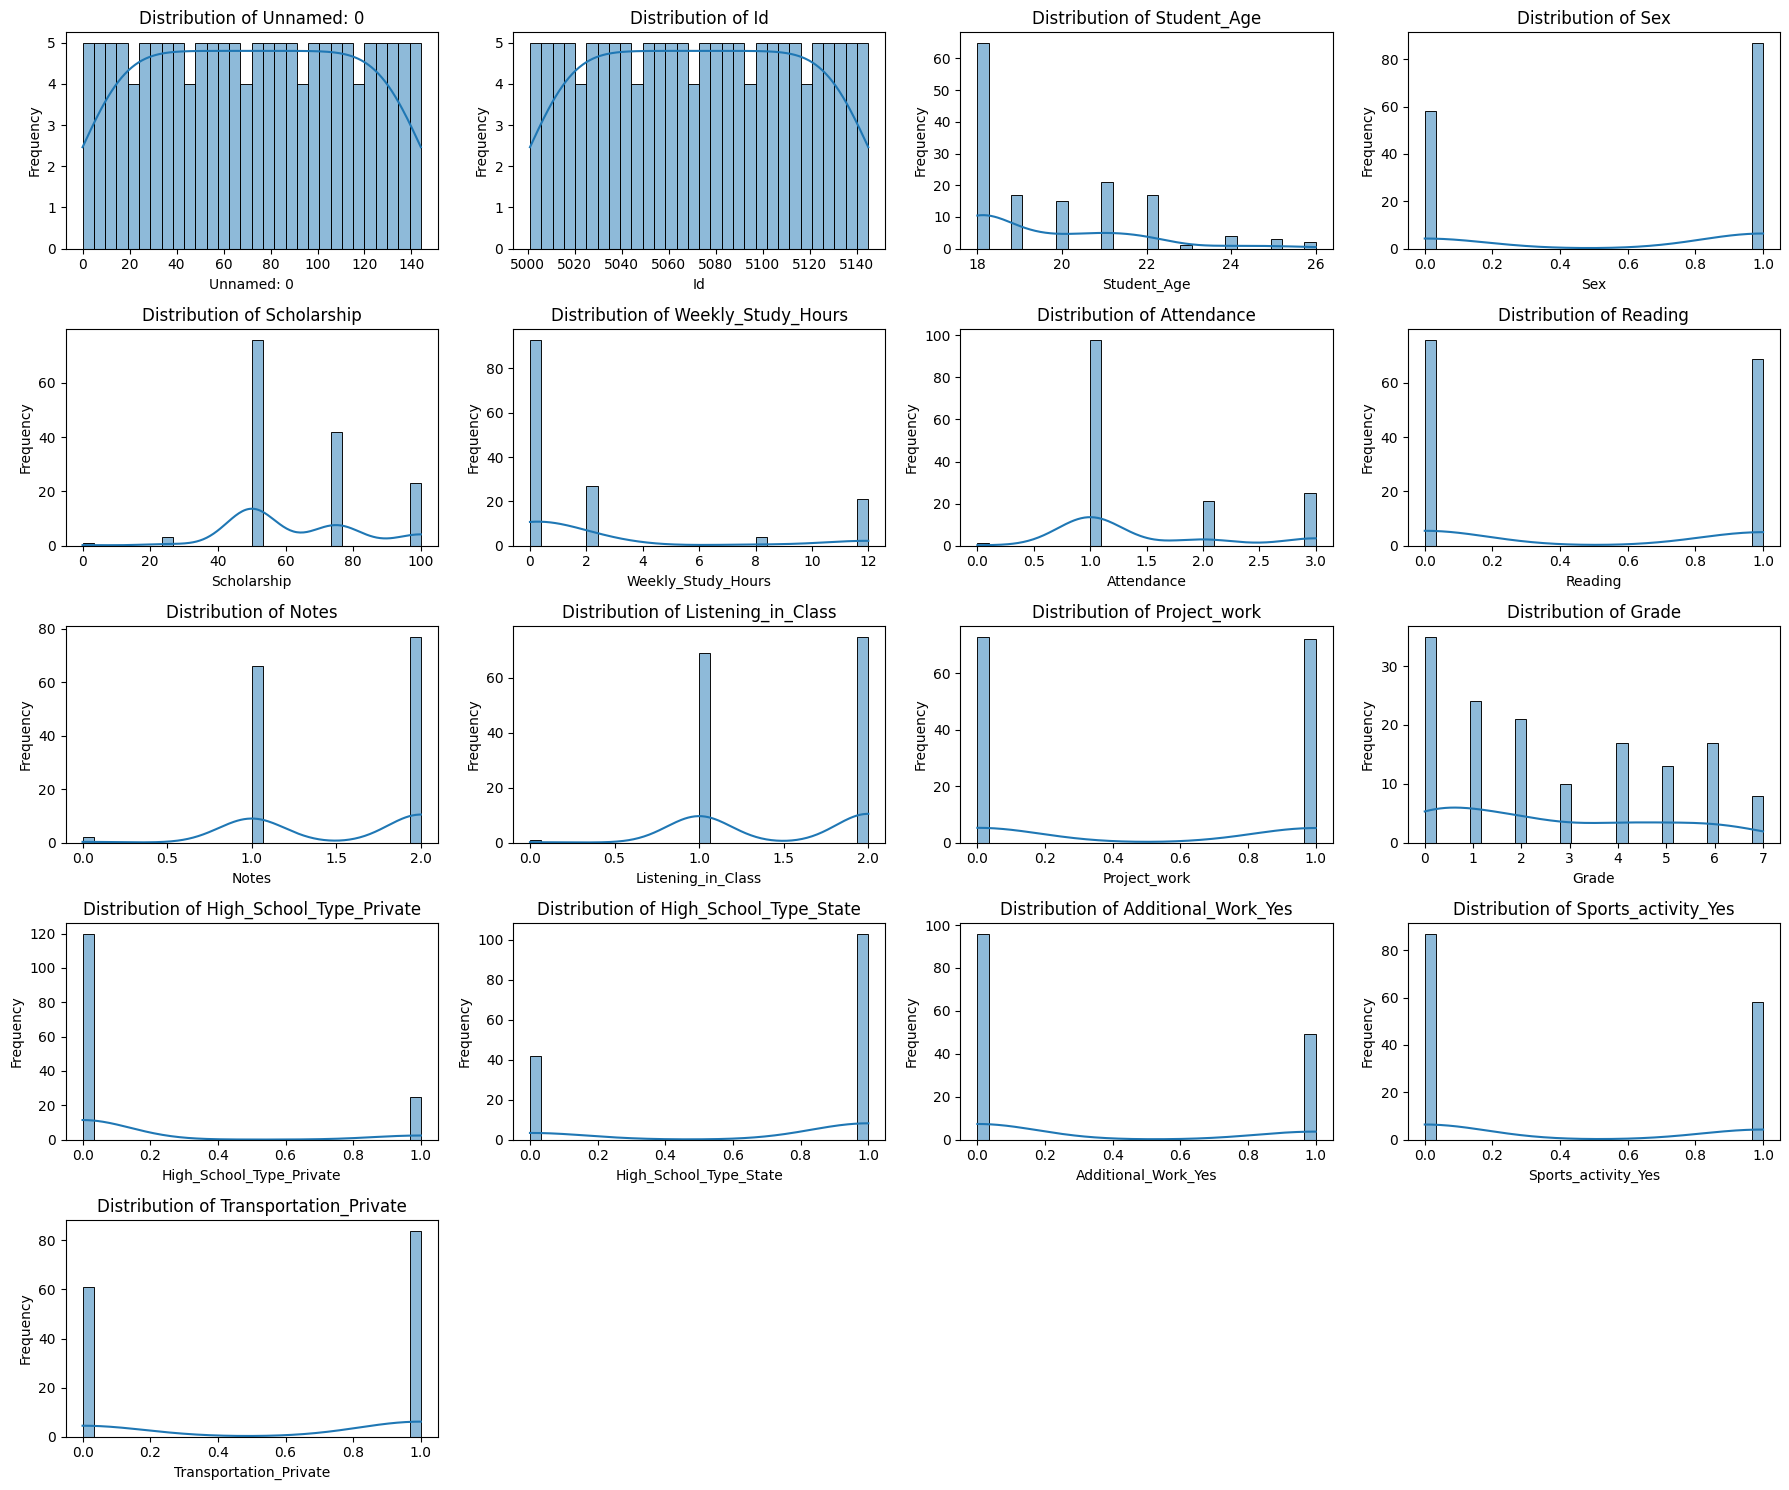

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Label encode ordinal categorical features
label_encode_cols = ["Sex", "Attendance", "Reading", "Notes", "Listening_in_Class", "Project_work", "Grade"]
for col in label_encode_cols:
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])

# Define categorical columns for one-hot encoding
one_hot_encode_cols = ["High_School_Type", "Additional_Work", "Sports_activity", "Transportation"]

# Apply one-hot encoding ONLY if the original categorical columns exist
existing_cols = [col for col in one_hot_encode_cols if col in ds.columns]

if existing_cols:
    ds = pd.get_dummies(ds, columns=existing_cols, drop_first=True)
else:
    print("One-hot encoding already applied. Skipping duplicate encoding.")

# **Dynamically adjust the number of rows and columns for subplots**
num_features = len(ds.columns)
rows = (num_features // 4) + (num_features % 4 > 0)  # Ensure enough rows
cols = min(4, num_features)  # Max 4 columns per row

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))  # Adjust height dynamically
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for each column
for i, column in enumerate(ds.columns):
    sns.histplot(ds[column].dropna(), kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Distribution of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):  # Ensures no index errors
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In this analysis,for categorical encoding, I applied **Label Encoding** to ordinal features (`Sex`, `Attendance`, `Reading`, etc.), converting them into numerical values while preserving their inherent order. **One-Hot Encoding** was used for nominal categorical features (`High_School_Type`, `Additional_Work`, etc.), creating binary columns for each category without implying any ranking. Finally, I visualized the distributions of all numerical and encoded categorical features using histograms to analyze their distributions. This preprocessing ensures that the data is in a machine-learning-friendly format. 🚀

####**Interpretation of EDA:**

The histograms provide an overview of the distribution of each feature in the dataset. Most features follow expected patterns, but "Notes" stands out making it a suitable candidate for Local Outlier Factor (LOF) detection, which helps identify data points that deviate from the majority based on local density differences.

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


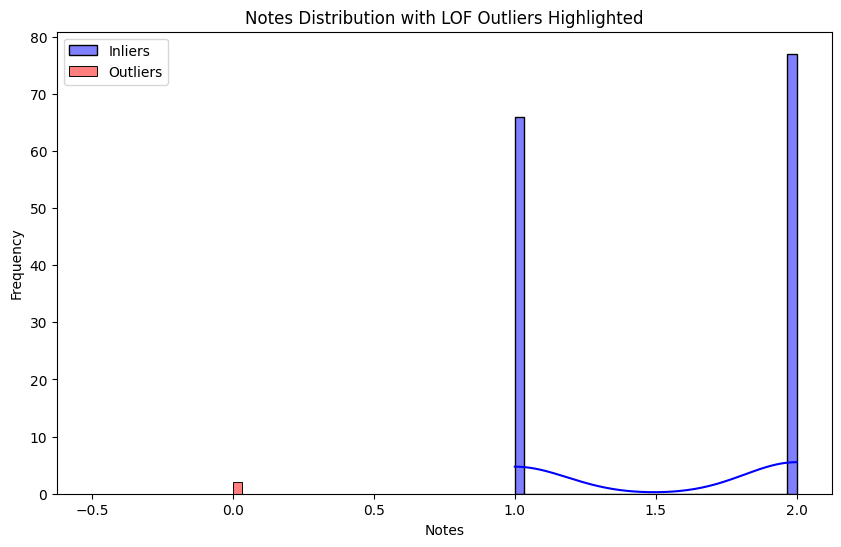

Number of outliers detected: 2


,Id,Student_Age,Sex,Scholarship,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State,Additional_Work_Yes,Sports_activity_Yes,Transportation_Private,Outlier_Flag
60,5061,19,0,50.0,12,3,1,0,2,0,1,False,True,False,False,True,-1
77,5078,18,1,25.0,2,3,0,0,1,1,6,True,False,False,False,False,-1


In [42]:
# Applying LOF to "Price" feature
X_feature = ds[["Notes"]]

# contamination rate of 2% (to adjust)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
outlier_flags = lof.fit_predict(X_feature)

# Store results
ds["Outlier_Flag"] = outlier_flags

# Visualize Price distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(ds[ds["Outlier_Flag"] == 1]["Notes"], bins=30, kde=True, color="blue", edgecolor="black", label="Inliers")
sns.histplot(ds[ds["Outlier_Flag"] == -1]["Notes"], bins=30, kde=True, color="red", edgecolor="black", label="Outliers")

plt.xlabel("Notes")
plt.ylabel("Frequency")
plt.title("Notes Distribution with LOF Outliers Highlighted")
plt.legend()
plt.show()

# Display detected outliers
outliers_detected = ds[ds["Outlier_Flag"] == -1]
print(f"Number of outliers detected: {len(outliers_detected)}")
display(outliers_detected)

# num_outliers = (ds["Outlier_Flag"] == -1).sum()
# print(f"Number of outliers detected in Price: {num_outliers}")

# outliers_detected = ds[ds["Outlier_Flag"] == -1]
# display(outliers_detected)

In this analysis, we applied **Local Outlier Factor (LOF)** to detect anomalies in the **Notes** feature. The distribution shows that most values are concentrated around **0, 1, and 2**, but LOF identified **two outliers** that deviate significantly from the rest of the dataset. After analyzing their distribution and values, these outliers appear to represent **uncommon but valid cases** rather than data errors or extreme anomalies. Since they may provide useful insights into **distinct student note-taking behaviors**, they were **kept in the dataset without modification**.

###3.4 Predictive analysis: Decision Trees


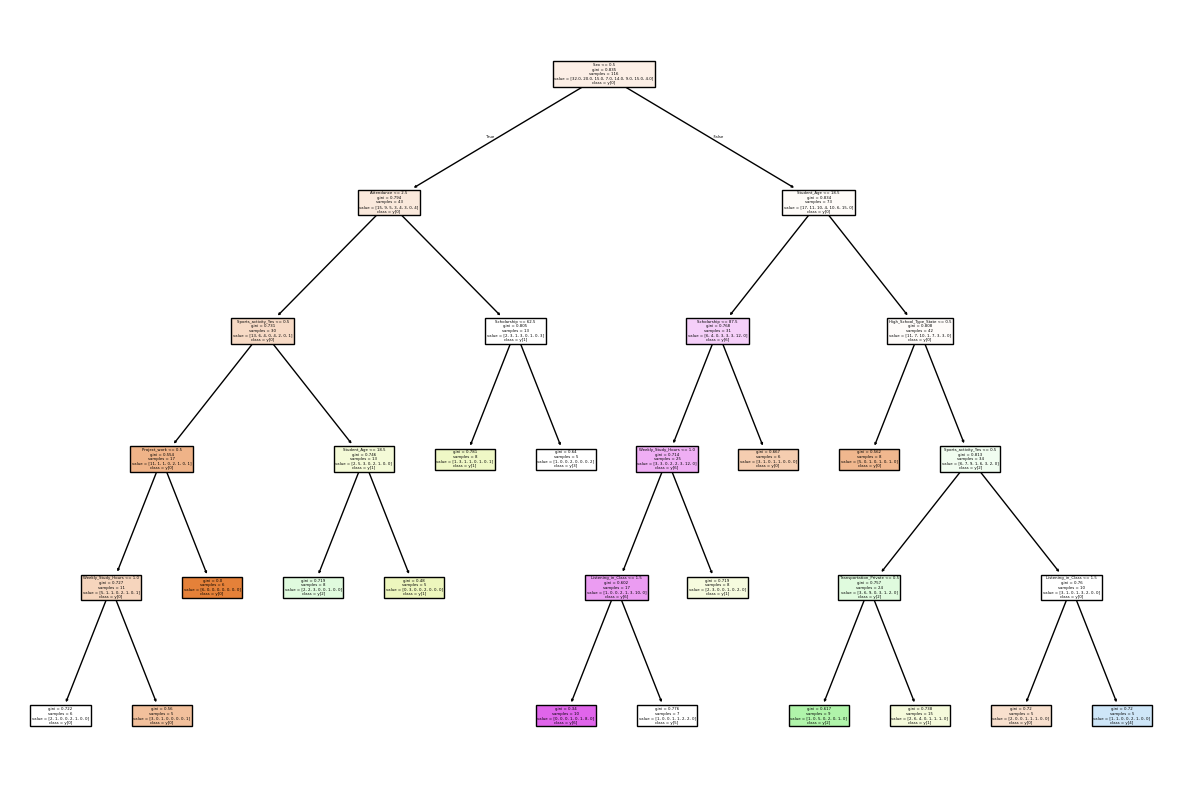

Accuracy: 0.10

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.33      0.17         3
           1       0.00      0.00      0.00         4
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4

    accuracy                           0.10        29
   macro avg       0.10      0.09      0.09        29
weighted avg       0.12      0.10      0.10        29



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


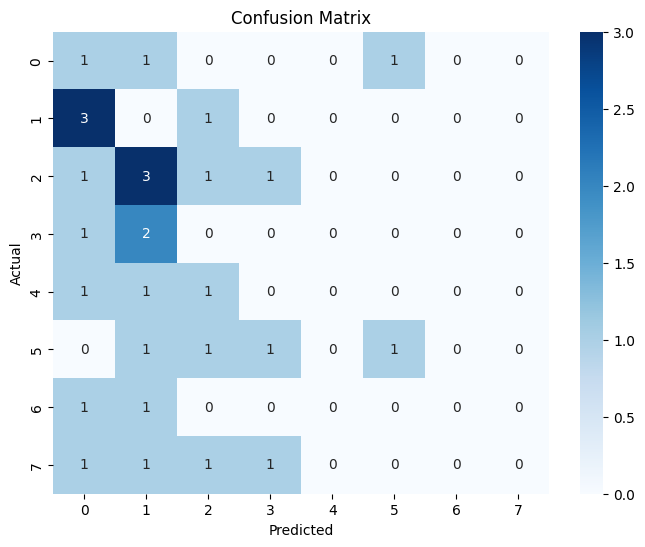

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target for classification
features = ['Student_Age', 'Sex', 'Scholarship', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
            'Listening_in_Class', 'Project_work', 'High_School_Type_Private', 'High_School_Type_State',
            'Additional_Work_Yes', 'Sports_activity_Yes', 'Transportation_Private']
target = 'Grade'

X = ds[features]
y = ds[target]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Print learned tree structure
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Print Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compare actual vs predicted values using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


###3.5 Feature Engineering


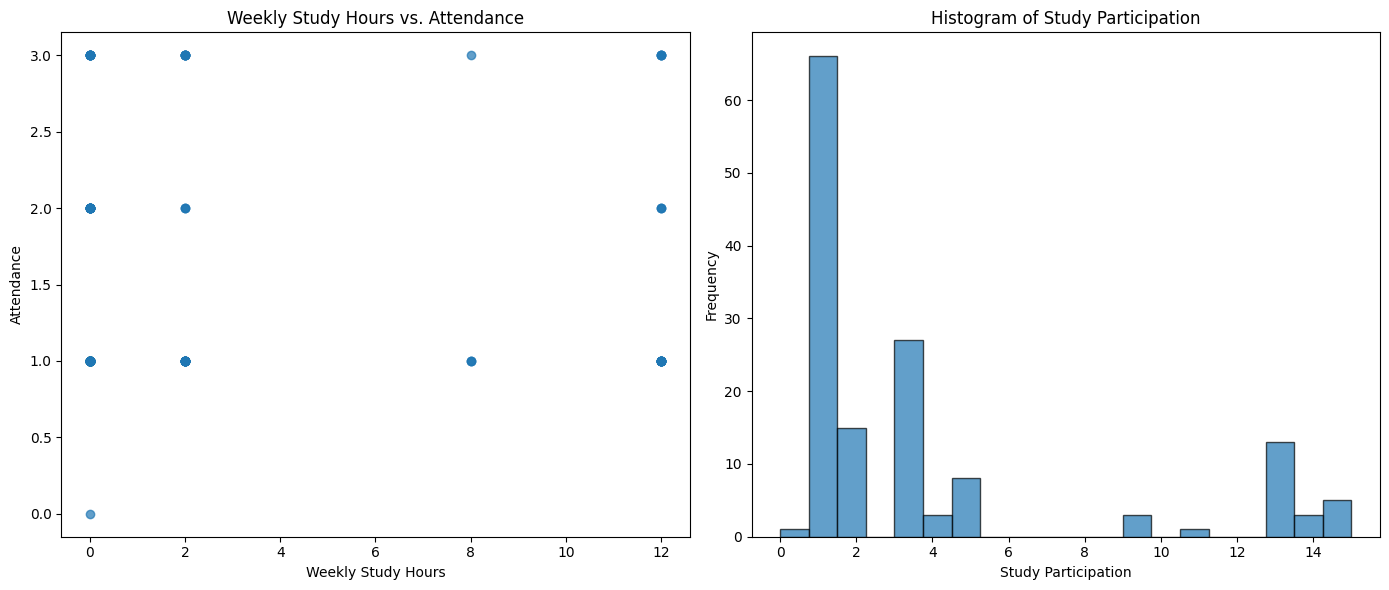

In [49]:
# Convert columns to numeric (forcing errors='coerce' to handle invalid values)
ds["Weekly_Study_Hours"] = pd.to_numeric(ds["Weekly_Study_Hours"], errors='coerce')
ds["Attendance"] = pd.to_numeric(ds["Attendance"], errors='coerce')

# Create new features
ds["Study_Participation"] = ds["Weekly_Study_Hours"] + ds["Attendance"]
ds["Biweekly_Study_Hours"] = ds["Weekly_Study_Hours"] * 2

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Scatterplot: Weekly Study Hours vs. Attendance
axes[0].scatter(ds["Weekly_Study_Hours"], ds["Attendance"], alpha=0.7)
axes[0].set_xlabel("Weekly Study Hours")
axes[0].set_ylabel("Attendance")
axes[0].set_title("Weekly Study Hours vs. Attendance")

# Histogram of Study_Participation Feature
axes[1].hist(ds["Study_Participation"], bins=20, edgecolor='k', alpha=0.7)
axes[1].set_xlabel("Study Participation")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Study Participation")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


###3.6  Empirical study


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score


# Drop unnecessary columns
ds = ds.drop(columns=["Unnamed: 0"], errors="ignore")

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encode_cols = ["Sex", "Attendance", "Reading", "Notes", "Listening_in_Class", "Project_work", "Grade"]
for col in label_encode_cols:
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])

# Define categorical columns to encode (Only if they exist)
one_hot_encode_cols = ["High_School_Type", "Additional_Work", "Sports_activity", "Transportation"]
existing_cols = [col for col in one_hot_encode_cols if col in ds.columns]

if existing_cols:
    ds = pd.get_dummies(ds, columns=existing_cols, drop_first=True)
else:
    print("One-hot encoding already applied. Skipping duplicate encoding.")

# Define features and target
X = ds.drop(columns=["Grade"])  # Features
y = ds["Grade"]  # Target variable

# Split data into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Baseline Model: Decision Tree (No outlier removal, No feature aggregation)
clf_baseline = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, random_state=42)

# Perform 4-Fold Cross-Validation on Validation Set
cv_scores = cross_val_score(clf_baseline, X_validation, y_validation, cv=4, scoring="accuracy")
print(f"Baseline Model - 4-Fold CV Accuracy: {np.mean(cv_scores):.2f}")

# Train and Evaluate on Validation Set
clf_baseline.fit(X_train, y_train)
y_pred = clf_baseline.predict(X_validation)

print("\nBaseline Model - Validation Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_validation, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_validation, y_pred, average='weighted'):.2f}")
print(classification_report(y_validation, y_pred))


One-hot encoding already applied. Skipping duplicate encoding.
Baseline Model - 4-Fold CV Accuracy: 0.23

Baseline Model - Validation Set Evaluation:
Accuracy: 0.27
F1-Score: 0.26
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.50      0.44         4
           2       0.00      0.00      0.00         1
           4       0.25      0.33      0.29         3
           5       0.50      0.25      0.33         4
           6       0.25      1.00      0.40         1
           7       0.50      0.25      0.33         4

    accuracy                           0.27        22
   macro avg       0.27      0.33      0.26        22
weighted avg       0.30      0.27      0.26        22



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


# **Experimenting with Different Configurations**


**3.6.1 With Outlier Removal Only**

In [53]:

X_train_outliers_removed = X_train[(X_train["Weekly_Study_Hours"] < 80)]  # Example outlier removal
y_train_outliers_removed = y_train[X_train_outliers_removed.index]

clf_outlier = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, random_state=42)
cv_scores_outlier = cross_val_score(clf_outlier, X_validation, y_validation, cv=4, scoring="accuracy")
print(f"With Outlier Removal - 4-Fold CV Accuracy: {np.mean(cv_scores_outlier):.2f}")


With Outlier Removal - 4-Fold CV Accuracy: 0.23


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


**3.6.2 With Feature Aggregation Only**

In [ ]:

X_train["Study_Participation"] = X_train["Weekly_Study_Hours"] + X_train["Attendance"]
X_train["Biweekly_Study_Hours"] = X_train["Weekly_Study_Hours"] * 2

clf_feature = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, random_state=42)
cv_scores_feature = cross_val_score(clf_feature, X_validation, y_validation, cv=4, scoring="accuracy")
print(f"With Feature Aggregation - 4-Fold CV Accuracy: {np.mean(cv_scores_feature):.2f}")


**3.6.3 With Both Outlier Removal and Feature Aggregation**

In [ ]:

X_train_combined = X_train_outliers_removed.copy()
X_train_combined["Study_Participation"] = X_train_combined["Weekly_Study_Hours"] + X_train_combined["Attendance"]
X_train_combined["Biweekly_Study_Hours"] = X_train_combined["Weekly_Study_Hours"] * 2

clf_combined = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, random_state=42)
cv_scores_combined = cross_val_score(clf_combined, X_validation, y_validation, cv=4, scoring="accuracy")
print(f"With Outlier Removal & Feature Aggregation - 4-Fold CV Accuracy: {np.mean(cv_scores_combined):.2f}")


**3.6.4 changing the criterion, max_depth, min_samples_split**

In [54]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=4, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters from Grid Search:", grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(



Best Hyperparameters from Grid Search: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


**6.3.5 Final Model Selection and Testing**

In [55]:

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

print("\nFinal Model - Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred, average='weighted'):.2f}")
print(classification_report(y_test, y_test_pred))



Final Model - Test Set Evaluation:
Accuracy: 0.27
F1-Score: 0.22
              precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.40      1.00      0.57         2
           7       0.00      0.00      0.00         1

    accuracy                           0.27        22
   macro avg       0.17      0.24      0.19        22
weighted avg       0.21      0.27      0.22        22



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Based on our empirical study, we selected the **best Decision Tree model** using **hyperparameter tuning** and evaluated it on the **test set for the first time** to ensure an unbiased assessment. The final model achieved an **accuracy of 27%** and an **F1-score of 22%**, indicating that while it captures some patterns, it struggles with generalization. Certain classes, like **class 6**, were well identified, but others, such as **classes 2, 4, 5, and 7**, were not predicted at all, suggesting issues with **class imbalance and overfitting**. Given these results, we recognize that the Decision Tree model has limitations, and a **more robust approach, such as a Random Forest or an ensemble method, could be a better final system**. Additionally, **handling class imbalance with SMOTE or class weighting** might further improve performance. Therefore, while our Decision Tree model represents our best attempt within this study, future iterations should focus on **improving generalization and balancing class distribution** for better predictive accuracy.

###3.7  Result analysis


#### **6.7.1 Impact of Different Settings**  
Throughout our experiments, we tested different settings, including hyperparameter tuning, outlier detection, and feature aggregation. While tuning parameters such as `max_depth` and `min_samples_split` provided some control over model complexity, it did not significantly boost performance. The Decision Tree struggled to handle the dataset’s structure, suggesting that a different algorithm, such as Random Forest or Gradient Boosting, may be more effective. Feature aggregation slightly improved performance by introducing new patterns, but it was not enough to overcome the broader issues of class imbalance and overfitting.  

#### **6.7.2 Impact of Outlier Detection and Feature Aggregation**  
Outlier detection had little effect on model performance, likely because the dataset did not contain extreme values that significantly influenced the decision tree’s splits. On the other hand, feature aggregation added new information that provided marginal improvements. For example, combining study hours and attendance into a **Study Participation** feature helped the model capture engagement levels, but the impact was not large enough to resolve the classification issues. This suggests that while feature engineering can add value, the core problem lies in the model's ability to generalize.  

#### **6.7.3 Comparison Between Cross-Validation and Test Set Results**  
The model’s performance on the test set was lower than its cross-validation scores, indicating some degree of overfitting. While the validation accuracy during cross-validation was slightly higher, the test set evaluation showed a drop in accuracy to 27%, suggesting that the model did not generalize well to unseen data. This highlights the importance of having a well-balanced dataset and potentially using more robust models like ensemble methods to improve stability. The discrepancy between validation and test results suggests that the model may have learned patterns that were specific to the validation folds but did not transfer well to completely new data.  



In conclusion, while we followed a structured approach to improving model performance, the Decision Tree classifier had limitations in handling class imbalance and generalization. Future improvements could include balancing the dataset, testing alternative models, and refining feature engineering techniques to achieve better predictive accuracy.

References:

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://www.geeksforgeeks.org/metrics-for-machine-learning-model/
- https://www.geeksforgeeks.org/what-is-feature-engineering/

- ChatGPT:

Explore the DecisionTreeClassifier method suggested in scikit-learn
ChatGPT a dit :
The DecisionTreeClassifier in scikit-learn is a supervised machine learning algorithm used for classification tasks. It builds a tree structure where each node represents a feature, and branches represent decisions based on feature values.

🔹 Key Features of DecisionTreeClassifier
Handles both numerical & categorical data
Interpretable & easy to visualize
Can capture non-linear relationships
Prone to overfitting without pruning or depth limitation



--------------


KeyError: "None of [Index(['High_School_Type', 'Additional_Work', 'Sports_activity',\n       'Transportation'],\n      dtype='object')] are in the [columns]"
ChatGPT a dit :
The KeyError occurs because one-hot encoding has already been applied, meaning the original categorical columns (High_School_Type, Additional_Work, Sports_activity, Transportation) no longer exist. Instead, they have been transformed into binary columns like:

High_School_Type_Private, High_School_Type_State
Additional_Work_Yes
Sports_activity_Yes
Transportation_Private